In [163]:
import pandas as pd
import numpy as np
from itertools import product
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Tipping Points Coordinates

In [172]:
el_nino_basin = [
    (5,-165), (5, -160), (5, -155), (5, -150), (5, -145), (5, -140), (5, -135), (5, -130), (5, -125), (5, -120),
    (0, -165), (0, -160), (0, -155), (0, -150), (0, -145), (0, -140), (0, -135), (0, -130), (0, -125), (0, -120),
    (-5, -165), (-5, -160), (-5, -155), (-5, -150), (-5, -145), (-5, -140), (-5, -135), (-5, -130), (-5, -125), (-5, -120)]

AMOC_up = [(75, -10), (75, -5), (75, 0), (75, 5), (75, 10), (75, 15), (75, 20),
           (70, -15), (70, -10), (70, -5), (70, 0), (70, 5), (70, 10),
           (65, -10), (65, -5), (65, 0)] 


AMOC_subpolar_gyre = [(55, -55), (55, -50), (55, -45), (55, -40), (55, -35),
    (60, -60), (60, -55), (60, -50), (60, -40), (60, -35), (60, -30),
    (65, -35), (65, -30),
    ]

AMOC_golf = [(10,-50), (15, -55), (15, -50),
            (20, -70), (20, -65), (20, -60), (20, -55), (20, -50),
            (25, -70), (25, -65), (25, -60), (25, -55), (25, -50),
            (30, -75), (30, -70), (30, -65), (30, -60), (30, -55), (30, -50),
            (35, -70), (35, -65), (35, -60), (35, -55), (35, -50), (35, -45),
            (40, -70), (40, -65), (40, -60), (40, -55), (40, -50)]

AMOC_europe_NorthA = [(50, -25), (50, -20), (50, -15), (50, -10),
                      (45, -35), (45, -30), (45, -25), (45, -20), (45, -15), (45, -10),
                      (40, -35), (40, -30), (40, -25), (40, -20), (40, -15), (40, -10),
                      (35, -35), (35, -30), (35, -25), (35, -20), (35, -15),
                      (30, -35), (30, -30), (30, -25), (30, -20),
                      (25, -35), (25, -30), (25, -25), (25, -20)]

tibetan_plateau_snow_cover = [
    (35, 75), (35, 80), (35, 85), (35, 90), (35, 95), (35, 100),
    (30, 85), (30, 90), (30, 95), (30, 100)
]

coral_reef = [(20, -95), (15, 95), (25,-85), (10,-60), (15,-60), (20, -85), (25,-80), (20, -80), (25,-75), (20, -75), (20, -70), (10, -80), (15, -80), (15, -75), (15, -70),
              (15, -95), (10, -90), (0, -90), (25, -110),
              (15, -25), (5, -15), (25, 55),
              (25, 35), (20, 40), (15, 40), (-5, 40), (-10,40),  (-10,45), (-15,45), (-10,50),  (-5, 55),  (-15, 60),  (-10, 60), 
              (0,75), (5,75), (10,75), (15, 70), (20, 70),  # INDIA
              (15,95), (10, 95), (10,100), (5, 95), (5, 100), (-15, 145), (-15, 170), (10, 110), (10, 115), (10, 120), (10, 125), (15, 110), (15, 120), (5, 120), (5, 125), (0, 105), (5, 105), (0, 120), (0, 125), (0, 130), (0, 135), (-5, 110), (-5, 115), (-5, 120), (-5, 125), (-5, 130), (-5, 135),  (-10, 110), (-10, 115), (-10, 120), (-10, 125), (-10, 130), (-10, 135), (-10, 140), (-10, 145),  (-10, 150), (-10, 155), (-10, 160), (-10, 165),  (-5, 150), (-5, 155), (-15, 165), (-20, 165), (-20, 150), (-15, 140),
              (-20, 175), (-20, 180), (-15, 180), (-15, 180),  (-15, -170), 
              (20, -155), (20, -160), (25, -170), (25, -160),  (25, -165),] 

west_antarctic_ice_sheet = [
    (-80, -180), (-80, -175), (-80, -170), (-80, -165), (-80, -160), (-80, -155), (-80, -150), (-80, -145), (-80, -140), (-80, -135), (-80, -130), (-80, -125), (-80, -120), (-80, -115), (-80, -110), (-80, -105), (-80, -100),
    (-80, -95), (-80, -90), (-80, -85), (-80, -80), (-80, -75), (-80, -70), (-80, -65),  # Zona centrale del WAIS
    (-75, -100), (-75, -95), (-75, -90), (-75, -85), (-75, -80), (-75, -75), (-75, -70), (-75, -65),  
    (-70, -70),  # Zona settentrionale vicino alla Penisola Antartica
]

wilkes_basin = [
    (-70, 110), (-70, 115), (-70, 120), (-70, 125), (-70, 130), (-70, 135), 
    (-65, 115), (-65, 120), (-65, 125),  
    (-75, 140), (-75, 145), (-75, 150), (-70, 140), (-70, 145), (-70, 150), (-70, 155)
    ]

SMOC_south = [(-50, -35), (-50, -30), (-50, -25), (-50, -20), (-50, -15), (-50, -10),
        (-55, -50), (-55, -45), (-55, -40), (-55, -35), (-55, -30), (-55, -25), (-55, -20), (-55, -15), (-55, -10), (-55, -5), (-55, 0), (-55, 5), (-55, 10), (-55, 15), (-55, 20), (-55, 25), (-55, 30), (-55, 35), (-55, 40), (-55, 45), (-55, 50), (-55, 55), (-55, 60), (-55, 65), (-55, 70), (-55, 75), (-55, 80),
        (-60, -50), (-60, -45), (-60, -40), (-60, -35), (-60, -30), (-60, -25), (-60, -20), (-60, -15), (-60, -10), (-60, -5), (-60, 0), (-60, 5), (-60, 10), (-60, 15), (-60, 20), (-60, 25), (-60, 30), (-60, 35), (-60, 40), (-60, 45), (-60, 50), (-60, 55), (-60, 60), (-60, 65), (-60, 70), (-60, 75), (-60, 80),
        (-65, -50), (-65, -45), (-65, -40), (-65, -35), (-65, -30), (-65, -25), (-65, -20), (-65, -15), (-65, -10), (-65, -5), (-65, 0), (-65, 5), (-65, 10), (-65, 15), (-65, 20), (-65, 25), (-65, 30)
        ]

nodi_amazzonia = [(5, -65), (5, -60), (5, -55), (0, -75),  (0, -70), (0, -65), (0, -60), (0, -55), (0, -50), 
                  (-5, -75), (-5, -70), (-5, -65), (-5, -60), (-5, -55), (-5, -50), (-5, -45), 
                  (-10, -75), (-10, -70), (-10, -65), (-10, -60), (-10, -55), (-10, -50), 
                  (-15, -70), (-15, -65), (-15, -60), (-15, -55), (-20, -65)]

boreal_forest = [(60, -120), (60, -115), (60, -110), (60, -105), (60, -100), (55, -120), (55, -115), 
                 (55, -110), (55, -105), (55, -100), (55, -95), (55, -90), (50, -95), (50, -90), (50, -85), 
                 (50, -80), (50, -75), (50, -70), (55, -75), (55, -70), (55, -65), (60, 10), (60, 15), (60, 20), 
                 (60, 25), (60, 30), (60, 35), (60, 40), (60, 45), (60, 50), (60, 55), (60, 60), (60, 65), (60, 70), 
                 (60, 75), (60, 80), (60, 85), (60, 90), (60, 95), (60, 100), (60, 105), (60, 110), (60, 115), (60, 120), 
                 (60, 125), (60, 130), (60, 135), (65, 50), (65, 55), (55, 90)]

artic_seaice = [(85, -180), (85, -175), (85, -170), (85, -165), (85, -160), (85, -155), (85, -150), (85, -145), 
    (85, -140), (85, -135), (85, -130), (85, -125), (85, -120), (85, -115), (85, -110), (85, -105), 
    (85, -100), (85, -95), (85, -90), (85, -85), (85, -80), (85, -75), (85, -70), (85, -65), (85, -60), 
    (85, -55), (85, -50), (85, -45), (85, -40), (85, -35), (85, -30), (85, -25), (85, -20), (85, -15), 
    (85, -10), (85, -5), (85, 0), (85, 5), (85, 10), (85, 15), (85, 20), (85, 25), (85, 30), (85, 35), 
    (85, 40), (85, 45), (85, 50), (85, 55), (85, 60), (85, 65), (85, 70), (85, 75), (85, 80), (85, 85), 
    (85, 90), (85, 95), (85, 100), (85, 105), (85, 110), (85, 115), (85, 120), (85, 125), (85, 130), 
    (85, 135), (85, 140), (85, 145), (85, 150), (85, 155), (85, 160), (85, 165), (85, 170), (85, 175), 
    (90, -180), (90, -175), (90, -170), (90, -165), (90, -160), (90, -155), (90, -150), (90, -145), 
    (90, -140), (90, -135), (90, -130), (90, -125), (90, -120), (90, -115), (90, -110), (90, -105), 
    (90, -100), (90, -95), (90, -90), (90, -85), (90, -80), (90, -75), (90, -70), (90, -65), (90, -60), 
    (90, -55), (90, -50), (90, -45), (90, -40), (90, -35), (90, -30), (90, -25), (90, -20), (90, -15), 
    (90, -10), (90, -5), (90, 0), (90, 5), (90, 10), (90, 15), (90, 20), (90, 25), (90, 30), (90, 35), 
    (90, 40), (90, 45), (90, 50), (90, 55), (90, 60), (90, 65), (90, 70), (90, 75), (90, 80), (90, 85), 
    (90, 90), (90, 95), (90, 100), (90, 105), (90, 110), (90, 115), (90, 120), (90, 125), (90, 130), 
    (90, 135), (90, 140), (90, 145), (90, 150), (90, 155), (90, 160), (90, 165), (90, 170), (90, 175), 
    (80, 0), (80, 5), (80, 10), (80, 15), (80, 20), (80, 25), (80, 30), (80, 35), (80, 40), (80, 45), 
    (80, 50), (80, 55), (80, 60), (80, 65), (80, 70), (80, 75), (80, 80), (80, 85), (80, 90), (80, 95), 
    (80, 100), (80, 105), (80, 110), (80, 115), (80, 120), (80, 125), (80, 130), (80, 135), (80, 140), 
    (80, 145), (80, 150), (80, 155), (80, 160), (80, 165), (80, 170), (80, 175), (80, -180), (80, -175), 
    (80, -170), (80, -165), (80, -160), (80, -155), (80, -150), (80, -145), (80, -140), (80, -135), 
    (80, -130), (80, -125), (80, -120), (80, -115), (80, -110), (80, -5), (80, -10), (80, -15), 
    (75, -180), (75, -175), (75, -170), (75, -165), (75, -160), (75, -155), (75, -150), (75, -145), 
    (75, -140), (75, -135), (75, 165), (75, 170), (75, 175)
]

sahel = [
    (10, -15), (10, -10), (10, -5), (10, 0), (10, 5), (10, 10), (10, 15), (10, 20), (10, 25), (10, 30), (10, 35),
    (15, -15), (15, -10), (15, -5), (15, 0), (15, 5), (15, 10), (15, 15), (15, 20), (15, 25), (15, 30), (15, 35)
]


greenland_ice_sheet = [
    (80, -90), (80, -85), (80, -80), (80, -75), (80, -70), (80, -65), (80, -60),
    (80, -55), (80, -50), (80, -45), (80, -40), (80, -35), (80, -30), (80, -25),
    (75, -55), (75, -50), (75, -45), (75, -40), (75, -35), (75, -30), (75, -25),
    (70, -50), (70, -45), (70, -40), (70, -35), (70, -30), (70, -25),
    (65, -45), (65, -50)
]



permafrost = [

    (65, -160), (65, -155), (65, -150), (65, -145), (65, -140), (65, -135), (65, -130), (65, -125),
    (65, -120), (65, -115), (65, -110), (65, -105), (65, -100), (65, -95), (65, 60), (65, 65), (65, 70),
    (65, 75), (65, 80), (65, 85), (65, 90), (65, 95), (65, 100), (65, 105), (65, 110), (65, 115), (65, 120),
    (65, 125), (65, 130), (65, 135), (65, 140), (65, 145), (65, 150), (65, 155), (65, 160), (65, 165),
    (65, 170), (65, 175), (70, -155), (70, -115), (70, -110), (70, -105), (70, -100), (70, -95), (70, -90),
    (70, -85), (70, -80), (70, -75), (70, -70), (70, 50), (70, 65), (70, 70), (70, 75), (70, 80), (70, 85),
    (70, 90), (70, 95), (70, 100), (70, 105), (70, 110), (70, 115), (70, 120), (70, 125), (70, 130),
    (70, 135), (70, 140), (70, 145), (70, 150), (70, 155), (70, 160), (70, 165), (70, 170), (70, 175),
    (75, 95), (75, 100), (75, 105)
]

all_Nodes = [(i, j) for i in range(-90, 91, 5) for j in range(-180, 181, 5)]


tipping_points = {
    'El Nino Basin': (el_nino_basin, 'r', (0, -140)),  # Blu profondo per rappresentare l'oceano
    'AMOC Up': (AMOC_up, 'forestgreen', (70, 0)),  # Verde scuro per correnti oceaniche
    'AMOC Subpolar Gyre': (AMOC_subpolar_gyre, 'steelblue', (60, -50)),  # Blu acciaio per le correnti fredde
    'AMOC Gulf': (AMOC_golf, 'gold', (30, -60)),  # Oro per rappresentare il calore del Golfo
    'AMOC Europe North Africa': (AMOC_europe_NorthA, 'mediumpurple', (40, -20)),  # Viola medio per l'Europa/Nord Africa
    'Tibetan Plateau Snow Cover': (tibetan_plateau_snow_cover, 'y', (35, 90)),  # Lavanda per la neve
    'Coral Reef': (coral_reef, 'coral', (0, 105)),  # Corallo per i reef corallini
    'West Antarctic Ice Sheet': (west_antarctic_ice_sheet, 'lightblue', (-75, -85)),  # Blu chiaro per il ghiaccio antartico
    'Wilkes Basin': (wilkes_basin, 'blueviolet', (-70, 115)),  # Violetto per il bacino di Wilkes
    'Boreal Forest': (boreal_forest, 'darkgreen',  (55, -110)),  # Verde scuro per la foresta boreale
    'Artic See Ice': (artic_seaice, 'lightskyblue', (85, -5)),  # Blu cielo chiaro per il ghiaccio marino artico
    'Permafrost': (permafrost, 'slategray', (65, 150)),  # Grigio ardesia per il permafrost
    'Greenland Ice Sheet': (greenland_ice_sheet, 'blue', (75, -40)),  # Crema di menta per il ghiaccio della Groenlandia
    'Amazon Rainforest': (nodi_amazzonia, 'darkolivegreen', (-10, -50)),  # Verde oliva scuro per la foresta amazzonica
    'Southern Meridional Overturning Circulation': (SMOC_south, 'plum', (-60, 0)),  # Prugna per la circolazione meridionale
    'Sahel': (sahel, 'saddlebrown', (10, 10)),
    'World': (all_Nodes, 'black', (0,0)),
    'All AMOC': (AMOC_up+AMOC_subpolar_gyre+AMOC_golf+AMOC_europe_NorthA, 'deepskyblue', (30, -40))
}

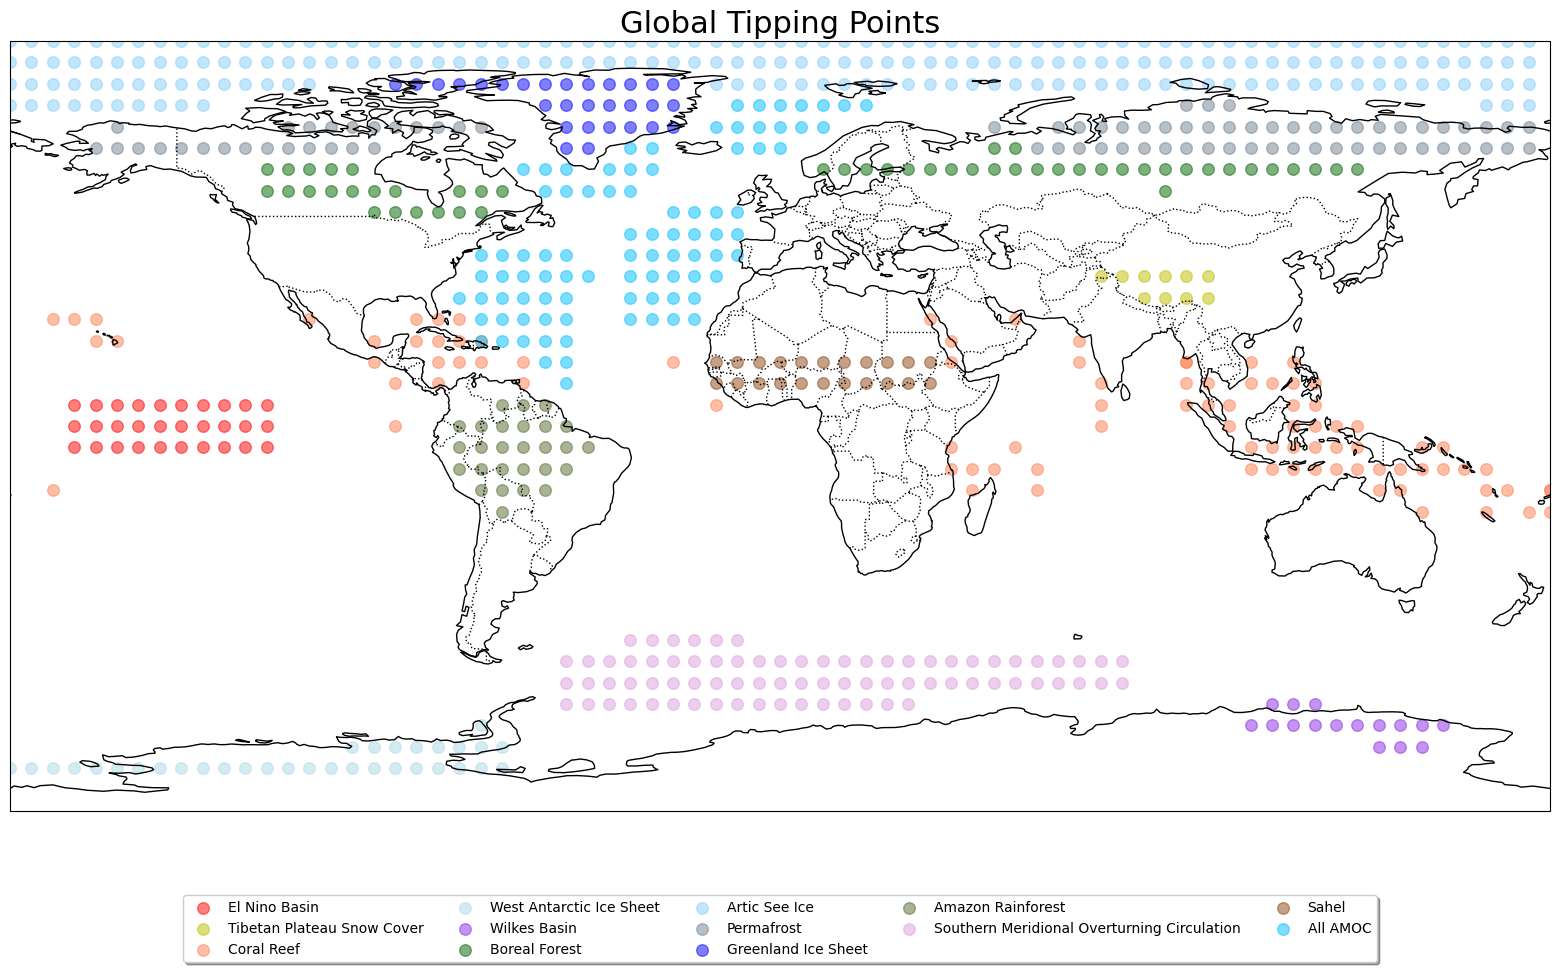

In [184]:
# Inizializzazione della figura e dell'asse con proiezione PlateCarree
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-180, 180, -90, 90])

for label, (points, color, legend) in tipping_points.items():
    # Skip specific keys
    if label in ["World", 'AMOC Up', 'AMOC Subpolar Gyre', 'AMOC Gulf', 'AMOC Europe North Africa']:
        continue  # This skips the rest of the loop for these keys
    
    latitudes, longitudes = zip(*points)
    ax.scatter(longitudes, latitudes, color=color, s=70, label=label, alpha=0.5, transform=ccrs.Geodetic())

# Impostazione della legenda esterna all'asse
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

plt.title('Global Tipping Points', fontsize= 22)

    # Save
percorso_file = f'C:\\Users\\David\\OneDrive\\Desktop\\CLIMATE_NETWORK\\Paper\\PLOT\\Tipping Points\\tipping_points.pdf'
plt.savefig(percorso_file,bbox_inches='tight',format='pdf')
plt.show()

In [129]:
### CHOOSE THE DATASET

df_loaded = pd.read_csv('C:\\Users\\David\\OneDrive\\Desktop\\CLIMATE_NETWORK\\Paper\\temp_tipping_mean_std_values_1970_2022.csv', header=[0, 1], index_col=[0, 1])
decades = [1970, 1980, 1990, 2000, 2010]

#df_loaded = pd.read_csv('C:\\Users\\David\\OneDrive\\Desktop\\CLIMATE_NETWORK\\Paper\\temp_tipping_mean_std_values_2022_2100.csv', header=[0, 1], index_col=[0, 1])
#decades = [2022, 2030, 2040, 2050, 2060, 2070, 2080, 2090]





#####  Set Dataframe Index
columns_tuples = list(zip(df_loaded.columns.get_level_values(0), df_loaded.columns.get_level_values(1)))
columns_multiindex = pd.MultiIndex.from_tuples(columns_tuples, names=df_loaded.columns.names)
df_loaded.set_index([df_loaded.index.get_level_values(0), df_loaded.index.get_level_values(1)], inplace=True)
df_loaded.index.names = ['Year', 'Type']

#df_mean = df_loaded.loc[(slice(None), 'mean'), ('El Nino Basin', slice(None))]
df_mean = df_loaded.loc[(slice(None), 'mean'), :]
df_std = df_loaded.loc[(slice(None), 'std'), :]
df_std = df_std.reset_index(level=1, drop=True)
df_mean = df_mean.reset_index(level=1, drop=True)

df_mean.head(10)

El Nino Basin                                         \
     El Nino Basin   AMOC Up AMOC Subpolar Gyre AMOC Gulf   
Year                                                        
1970      0.835926  0.274323           0.007378  0.252538   
1971      0.765872  0.020581           0.027003  0.044018   
1972      0.817813  0.035083           0.055659  0.304037   
1973      0.954853  0.184039           0.236716  0.102139   
1974      0.746165  0.011280           0.051705  0.069443   
1975      0.765542  0.042962           0.161572  0.031033   
1976      0.867820  0.041183           0.094544  0.128185   
1977      0.659055  0.015379           0.076152  0.045663   
1978      0.629004  0.037679           0.042036  0.072728   
1979      0.615560  0.014371           0.065140  0.035319   

                                                                     \
     AMOC Europe North Africa Tibetan Plateau Snow Cover Coral Reef   
Year                                                                  
1970                 0.049600                   0.019064   0.140542   
1971                 0.032265                   0.008243   0.060904   
1972                 0.013851                   0.011563   0.165913   
1973                 0.107090                   0.009473   0.235407   
1974                 0.048187                   0.007028   0.048664   
1975                 0.010292                   0.003377   0.107690   
1976                 0.129902                   0.007595   0.096641   
1977                 0.031025                   0.031490   0.068805   
1978                 0.026429                   0.014033   0.078444   
1979                 0.011731                   0.004790   0.067618   

                                                          ...     All AMOC  \
     West Antarctic Ice Sheet Wilkes Basin Boreal Forest  ... Wilkes Basin   
Year                                                      ...                
1970                 0.033526     0.015797      0.209639  ...     0.001811   
1971                 0.019713     0.013717      0.065928  ...     0.008350   
1972                 0.046692     0.062909      0.094341  ...     0.006657   
1973                 0.374419     0.041433      0.129419  ...     0.008479   
1974                 0.081226     0.014028      0.033418  ...     0.001603   
1975                 0.057249     0.020931      0.094295  ...     0.013895   
1976                 0.016964     0.026980      0.323431  ...     0.005499   
1977                 0.025527     0.018761      0.081656  ...     0.004688   
1978                 0.065514     0.034519      0.058978  ...     0.008882   
1979                 0.050769     0.031616      0.055561  ...     0.011809   

                                                                 \
     Boreal Forest Artic See Ice Permafrost Greenland Ice Sheet   
Year                                                              
1970      0.198037      0.168045   0.133838            0.315887   
1971      0.216381      0.225261   0.165643            0.313239   
1972      0.183528      0.173316   0.136356            0.314320   
1973      0.236079      0.310821   0.152971            0.324139   
1974      0.220517      0.216274   0.131529            0.304099   
1975      0.176288      0.198738   0.132687            0.315361   
1976      0.245996      0.251042   0.174504            0.321394   
1977      0.228129      0.157335   0.154445            0.318602   
1978      0.188513      0.182881   0.137197            0.321033   
1979      0.278149      0.244211   0.193200            0.331681   

                                                                              \
     Amazon Rainforest Southern Meridional Overturning Circulation     Sahel   
Year                                                                           
1970          0.176942                                    0.022331  0.152539   
1971          0.176906                                    0.033724  0.152669   


Dataset of Mean and Std values for the Decades

In [130]:

### Dataset 
#decades = [1970, 1980, 1990, 2000, 2010]  # Esempio di decadi
pairs = list(product(tipping_points.keys(), repeat=2))  # Tuo codice per i pairs
multiindex_columns = pd.MultiIndex.from_tuples(pairs)
anova_mean = pd.DataFrame(index=decades, columns=multiindex_columns)
adjacency_matrix_std = pd.DataFrame(index=decades, columns=multiindex_columns)


# fill dataset
for point1, point2 in pairs:
    for dec in decades:
        start_year = dec
        end_year = dec + 10
        subset = df_loaded.loc[(slice(start_year, end_year-1), slice(None)), (point1, point2)]
        mean_value = subset.xs('mean', level=1).mean()
        print(subset)
        
        # Calcola la deviazione standard combinata per 'std' usando la propagazione degli errori
        # Sostituisci questo con il tuo metodo specifico se necessario
        std_values = subset.xs('std', level=1)
        combined_std = np.sqrt(np.sum(std_values**2)) / len(std_values)
        
        # Assegna i valori calcolati alle matrici di adiacenza
        adjacency_matrix_mean.loc[dec, (point1, point2)] = mean_value
        adjacency_matrix_std.loc[dec, (point1, point2)] = combined_std

# A questo punto, hai 'adjacency_matrix_mean' e 'adjacency_matrix_std' riempite con i valori appropriati.
adjacency_matrix_mean
#adjacency_matrix_std

Year  Type
1970  mean    0.835926
      std     0.011429
1971  mean    0.765872
      std     0.012453
1972  mean    0.817813
      std     0.012421
1973  mean    0.954853
      std     0.004282
1974  mean    0.746165
      std     0.015819
1975  mean    0.765542
      std     0.015773
1976  mean    0.867820
      std     0.011262
1977  mean    0.659055
      std     0.015637
1978  mean    0.629004
      std     0.018434
1979  mean    0.615560
      std     0.015937
Name: (El Nino Basin, El Nino Basin), dtype: float64
Year  Type
1980  mean    0.702218
      std     0.014992
1981  mean    0.684103
      std     0.013966
1982  mean    0.731349
      std     0.013192
1983  mean    0.775165
      std     0.013108
1984  mean    0.590119
      std     0.017266
1985  mean    0.612909
      std     0.016097
1986  mean    0.828240
      std     0.014064
1987  mean    0.620407
      std     0.016923
1988  mean    0.816109
      std     0.015925
1989  mean    0.806525
      std     0.011779
Name:

El Nino Basin                                         \
     El Nino Basin   AMOC Up AMOC Subpolar Gyre AMOC Gulf   
2022      0.524111  0.051136           0.160287  0.131283   
2030      0.539302  0.045028           0.160226  0.122296   
2040      0.532659  0.038961            0.17223   0.12413   
2050      0.513902  0.037571           0.189867  0.106854   
2060      0.525422  0.029743           0.177137  0.095488   
2070      0.508853  0.028374           0.167432  0.080594   
2080      0.516391  0.024792            0.16766  0.069908   
2090      0.513714  0.019144           0.158801  0.055363   
1970      0.765761  0.067688           0.081791   0.10851   
1980      0.716714  0.045059           0.068702  0.083319   
1990      0.632444  0.053778            0.03115   0.05158   
2000      0.672932  0.036895            0.04253  0.062581   
2010      0.658947  0.039623           0.031148  0.041609   

                                                                     \
     AMOC Europe North Africa Tibetan Plateau Snow Cover Coral Reef   
2022                 0.026749                   0.016325   0.078412   
2030                 0.024811                   0.014808   0.081382   
2040                 0.023706                   0.018369   0.080864   
2050                 0.021245                   0.033562    0.07837   
2060                 0.024913                   0.019608   0.080741   
2070                  0.01419                   0.018483    0.07605   
2080                 0.020313                   0.016577   0.076157   
2090                 0.017911                   0.017108   0.075719   
1970                 0.046037                   0.011666   0.107063   
1980                 0.032296                   0.051696   0.082459   
1990                 0.016709                   0.021995   0.083495   
2000                  0.04075                   0.031715   0.075984   
2010                 0.023244                   0.026179   0.070705   

                                                          ...     All AMOC  \
     West Antarctic Ice Sheet Wilkes Basin Boreal Forest  ... Wilkes Basin   
2022                 0.027186     0.036808      0.052109  ...     0.001238   
2030                 0.034176     0.031338      0.052165  ...     0.001535   
2040                 0.028815     0.030215      0.054273  ...     0.003218   
2050                 0.029183     0.048845      0.049411  ...      0.00268   
2060                 0.026508     0.033193      0.044222  ...     0.001404   
2070                 0.022268     0.032117      0.036596  ...     0.001878   
2080                 0.020836     0.035319      0.035389  ...     0.002289   
2090                 0.021577     0.024612      0.036914  ...     0.001936   
1970                  0.07716     0.028069      0.114667  ...     0.007167   
1980                 0.061508     0.040614       0.09175  ...     0.008676   
1990                 0.047765     0.038531      0.045729  ...     0.009475   
2000                 0.037172     0.037684      0.074496  ...     0.010024   
2010                 0.055907     0.042433      0.059312  ...     0.012333   

                                                                 \
     Boreal Forest Artic See Ice Permafrost Greenland Ice Sheet   
2022      0.187108      0.136613   0.153941            0.231424   
2030      0.193612      0.132339   0.152942            0.232571   
2040      0.183127       0.13569   0.149663            0.239794   
2050      0.175178      0.133297   0.142465             0.23134   
2060      0.185895      0.134304   0.137475            0.239265   
2070      0.180165      0.122264   0.136358            0.224334   
2080      0.169764      0.118258   0.125087            0.223658   
2090       0.16598      0.124255   0.124604            0.226475   
1970      0.217161      0.212792   0.151237            0.317976   
1980      0.209915      0.198821   0.147629            0.305217   
1990      0.207981      0.196697   0.143083     

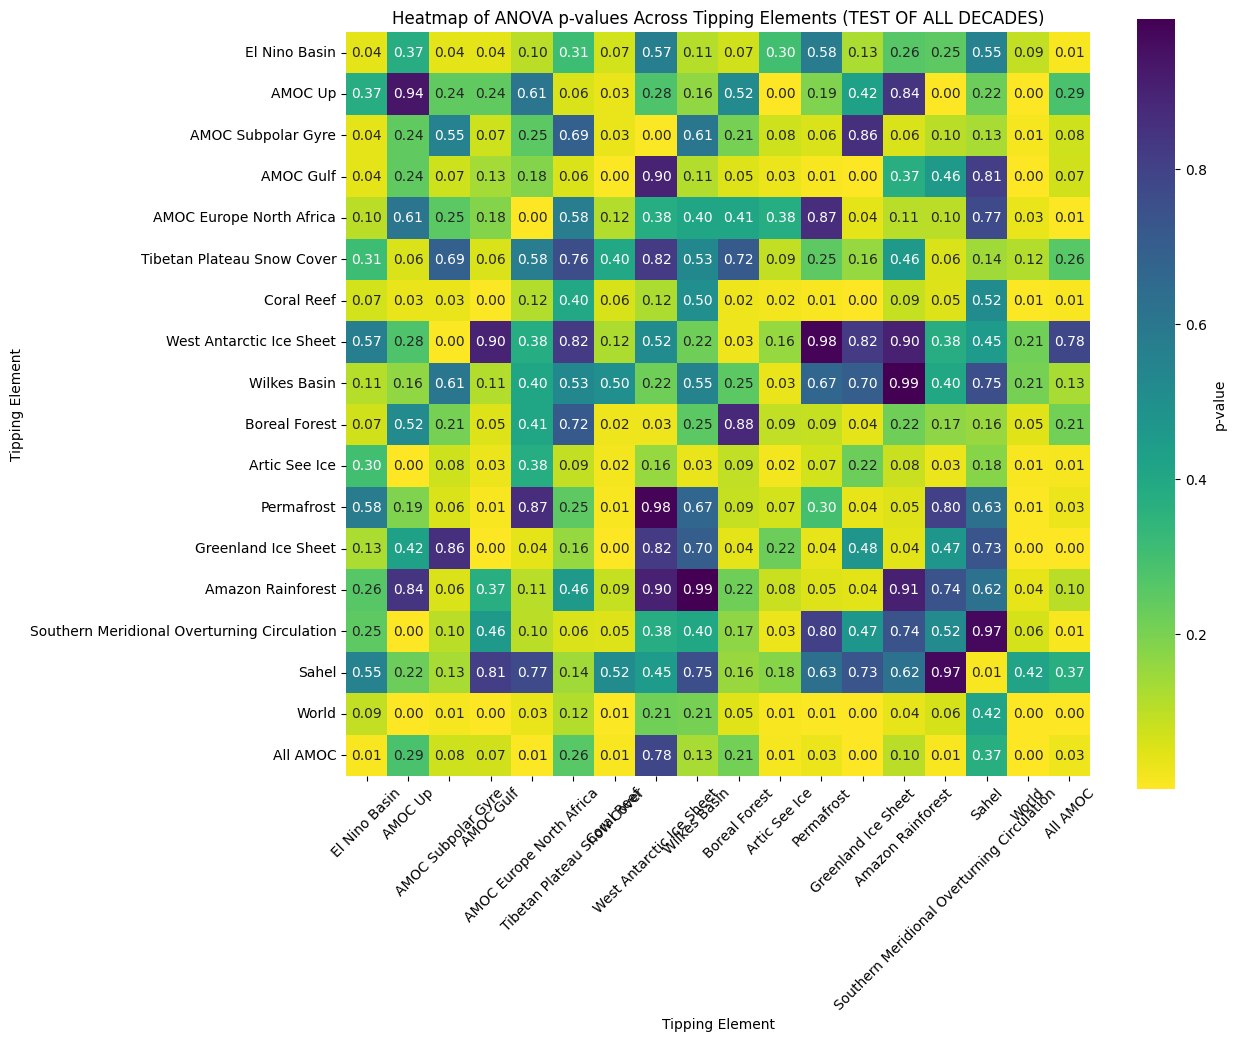

In [132]:
decades_test = [1970,  2010]  #1980, 1990, 2000,                 ##### Choosing the decades on which to perform the ANOVA test!
#decades_test = [2020,  2090]

pairs = list(product(tipping_points.keys(), repeat=2))
multiindex_columns = pd.MultiIndex.from_tuples(pairs)
pvalues_df = pd.DataFrame(index=tipping_points.keys(), columns=tipping_points.keys())

for point1, point2 in pairs:
    decade_data = {dec: [] for dec in decades_test}
    for dec in decades_test:
        start_year = dec
        end_year = dec + 10
        subset = df_loaded.loc[(slice(start_year, end_year-1), slice(None)), (point1, point2)]
        means = subset.xs('mean', level=1).values
        decade_data[dec].extend(means)

    lists_of_values = [values for values in decade_data.values() if values]
    if len(lists_of_values) > 1: 
        f_stat, p_value = f_oneway(*lists_of_values)
        pvalues_df.at[point1, point2] = p_value
    else:
        print(f"anova test faild for {(point1, point2)}")
        pvalues_df.at[point1, point2] = np.nan  


plt.figure(figsize=(12, 10))
sns.heatmap(pvalues_df.astype(float), annot=True, cmap='viridis_r', fmt=".2f", square=True, cbar_kws={'label': 'p-value'})
plt.title('Heatmap of ANOVA p-values Across Tipping Elements (TEST OF ALL DECADES)')
plt.xlabel('Tipping Element')
plt.ylabel('Tipping Element')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



Tipping Elements Network's features adjacency_matrix ancreation 

In [133]:
pairs = list(product(tipping_points.keys(), repeat=2))
multiindex_columns = pd.MultiIndex.from_tuples(pairs)

adjacency_matrix_mean = pd.DataFrame(index=decades, columns=multiindex_columns)
adjacency_matrix_std = pd.DataFrame(index=decades, columns=multiindex_columns)
adjacency_matrix_pervar = pd.DataFrame(index=decades, columns=multiindex_columns)
adjacency_matrix_pvalue = pd.DataFrame(index=decades, columns=multiindex_columns)


subset_1970 = df_loaded.loc[(slice(decades[0], decades[1]-1), 'mean'), :]

for dec in decades:
    for point1, point2 in pairs:

        start_year = dec
        end_year = dec + 10
        subset = df_loaded.loc[(slice(start_year, end_year-1), slice(None)), (point1, point2)]

        mean_value = subset.xs('mean', level=1).mean()
        std_values = subset.xs('std', level=1)
        combined_std = np.sqrt(np.sum(std_values**2)) / len(std_values)


        adjacency_matrix_mean.loc[dec, (point1, point2)] = mean_value
        adjacency_matrix_std.loc[dec, (point1, point2)] = combined_std

        f_stat, p_value = f_oneway(subset_1970[(point1, point2)], subset.xs('mean', level=1))
        adjacency_matrix_pvalue.loc[dec, (point1, point2)] = p_value


        #adjacency_matrix_pervar.loc[dec, (point1, point2)] = 0  
        riferimento = adjacency_matrix_mean.loc[decades[0], (point1, point2)]
        variazione_percentuale = ((mean_value - riferimento) / riferimento) * 100
        adjacency_matrix_pervar.loc[dec, (point1, point2)] = variazione_percentuale

# Visualizzazione delle matrici
print("Mean Adjacency Matrix:")
print(adjacency_matrix_mean)
print("\nStandard Deviation Adjacency Matrix:")
print(adjacency_matrix_std)
print("\nPercentage Variation Adjacency Matrix:")
subset_1970[(point1, point2)]
adjacency_matrix_pervar

Mean Adjacency Matrix:
     El Nino Basin                                         \
     El Nino Basin   AMOC Up AMOC Subpolar Gyre AMOC Gulf   
1970      0.765761  0.067688           0.081791   0.10851   
1980      0.716714  0.045059           0.068702  0.083319   
1990      0.632444  0.053778            0.03115   0.05158   
2000      0.672932  0.036895            0.04253  0.062581   
2010      0.658947  0.039623           0.031148  0.041609   

                                                                     \
     AMOC Europe North Africa Tibetan Plateau Snow Cover Coral Reef   
1970                 0.046037                   0.011666   0.107063   
1980                 0.032296                   0.051696   0.082459   
1990                 0.016709                   0.021995   0.083495   
2000                  0.04075                   0.031715   0.075984   
2010                 0.023244                   0.026179   0.070705   

                                                   

El Nino Basin                                           \
     El Nino Basin    AMOC Up AMOC Subpolar Gyre  AMOC Gulf   
1970           0.0        0.0                0.0        0.0   
1980     -6.404946 -33.431265         -16.002546 -23.215354   
1990    -17.409733 -20.550145         -61.914527  -52.46512   
2000    -12.122497 -45.491863         -48.001884  -42.32681   
2010    -13.948751 -41.461773         -61.916809 -61.654301   

                                                                     \
     AMOC Europe North Africa Tibetan Plateau Snow Cover Coral Reef   
1970                      0.0                        0.0        0.0   
1980               -29.847573                 343.148317 -22.980839   
1990               -63.704245                  88.544396 -22.013199   
2000               -11.484372                 171.863066 -29.028288   
2010               -49.510815                 124.408171 -33.959205   

                                                          ...     All AMOC  \
     West Antarctic Ice Sheet Wilkes Basin Boreal Forest  ... Wilkes Basin   
1970                      0.0          0.0           0.0  ...          0.0   
1980               -20.285005    44.690854     -19.98568  ...    21.053241   
1990               -38.096379    37.272699      -60.1201  ...    32.199754   
2000               -51.825195    34.254779     -35.03279  ...     39.85516   
2010               -27.544256    51.171236    -48.274244  ...    72.073821   

                                                                 \
     Boreal Forest Artic See Ice Permafrost Greenland Ice Sheet   
1970           0.0           0.0        0.0                 0.0   
1980     -3.336879     -6.565633  -2.385444           -4.012318   
1990     -4.227466     -7.564083  -5.391476           -4.600851   
2000     -5.575353    -14.162137  -5.435627           -7.268584   
2010     -7.212918    -21.843205 -12.206491          -10.176901   

                                                                               \
     Amazon Rainforest Southern Meridional Overturning Circulation      Sahel   
1970               0.0                                         0.0        0.0   
1980         -3.308465                                    4.400953   9.844603   
1990         -7.813408                                    4.567487  13.503908   
2000         -6.966169                                   -6.258305   8.386998   
2010         -9.421948                                   -22.94614  -4.980854   

                           
          World  All AMOC  
1970        0.0       0.0  
1980  -3.147659 -1.702614  
1990   -7.18093 -2.333615  
2000  -6.707028 -2.215796  
2010 -13.006295 -5.685282  

[5 rows x 324 columns]

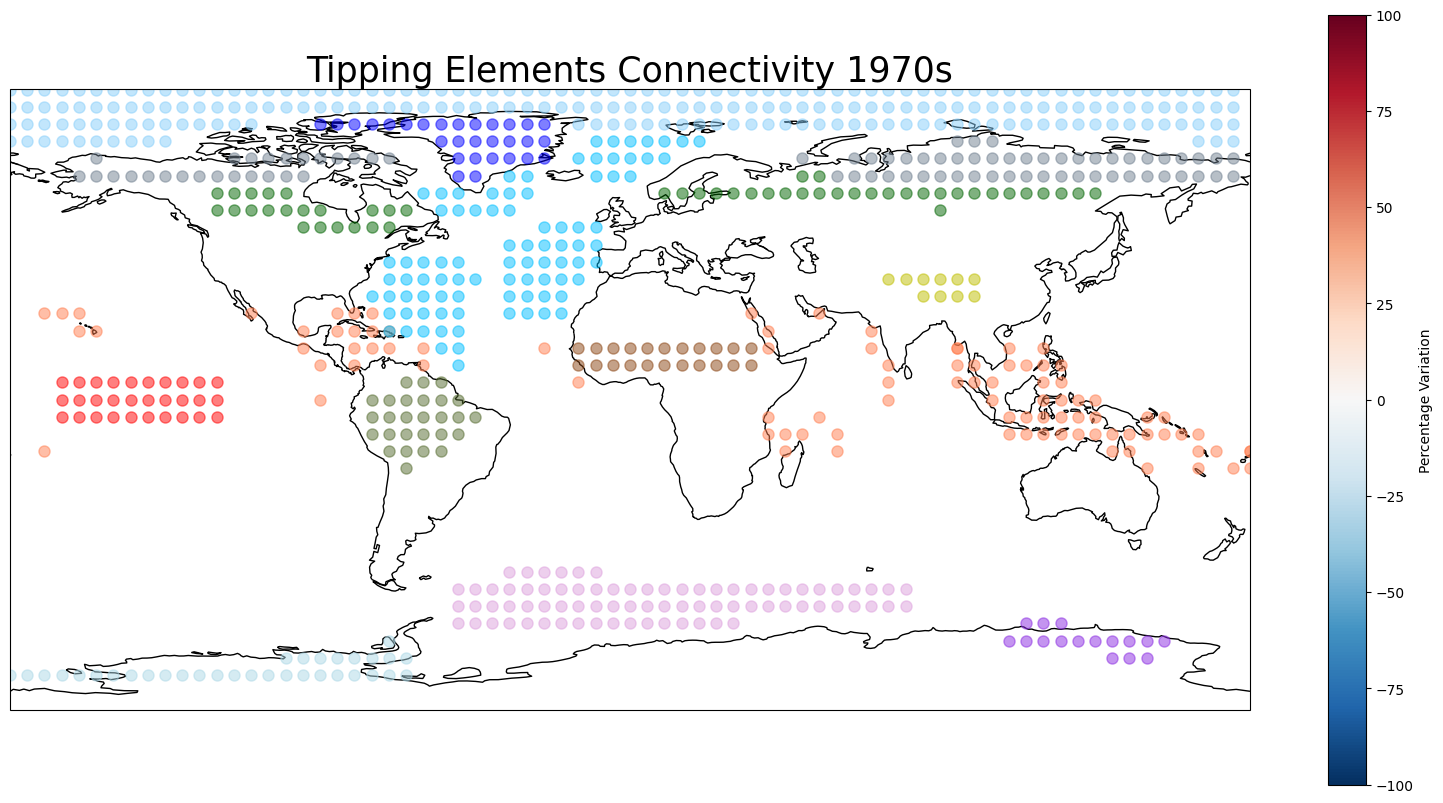

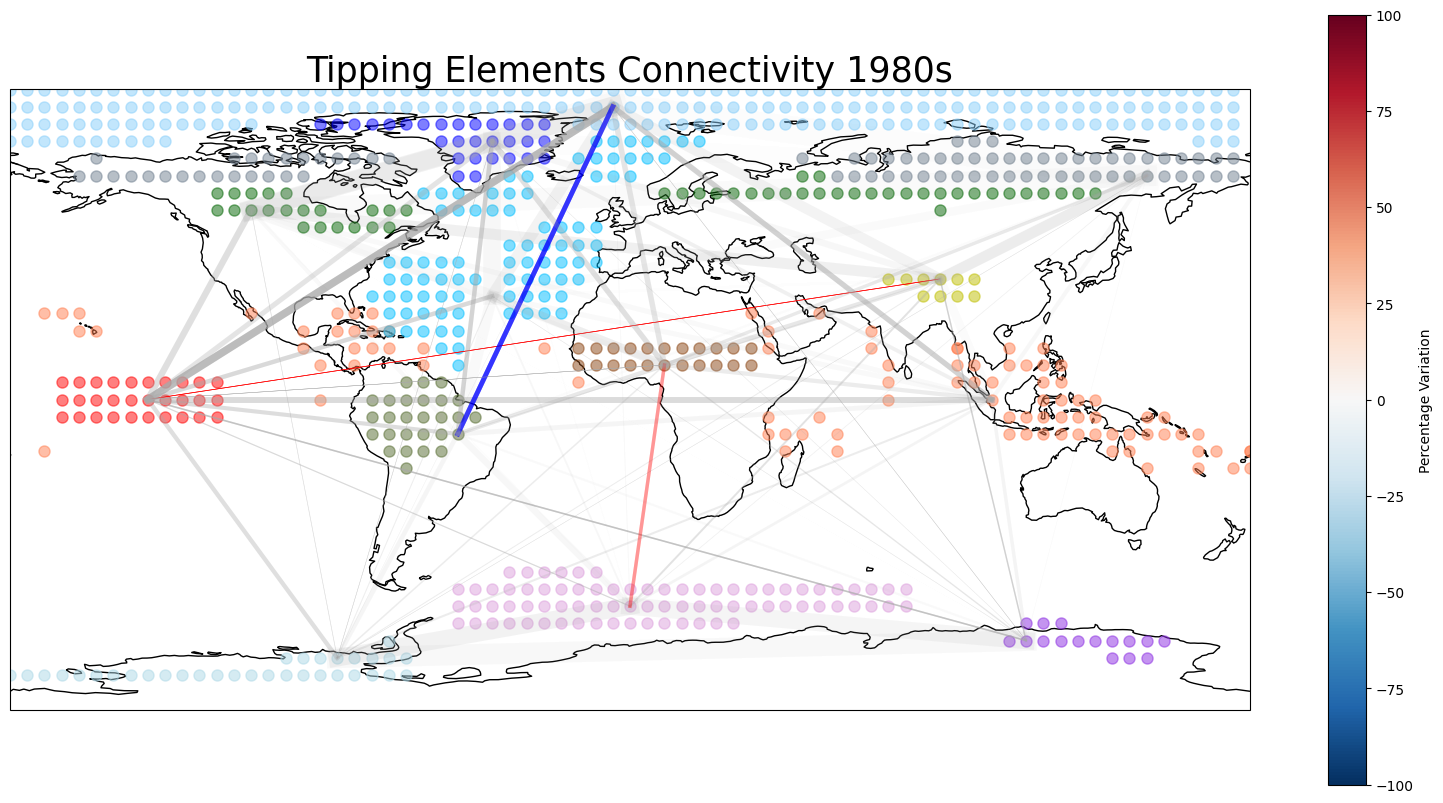

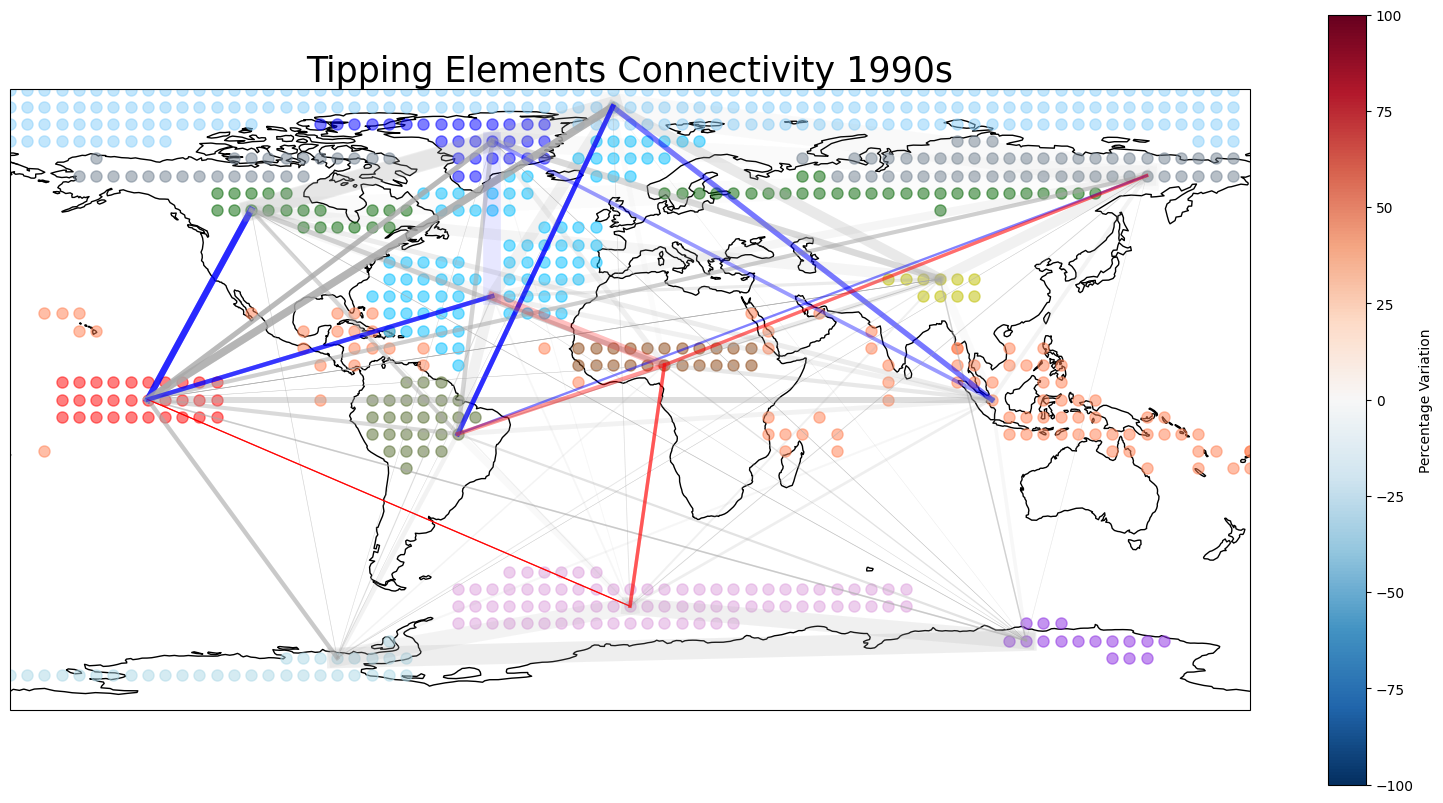

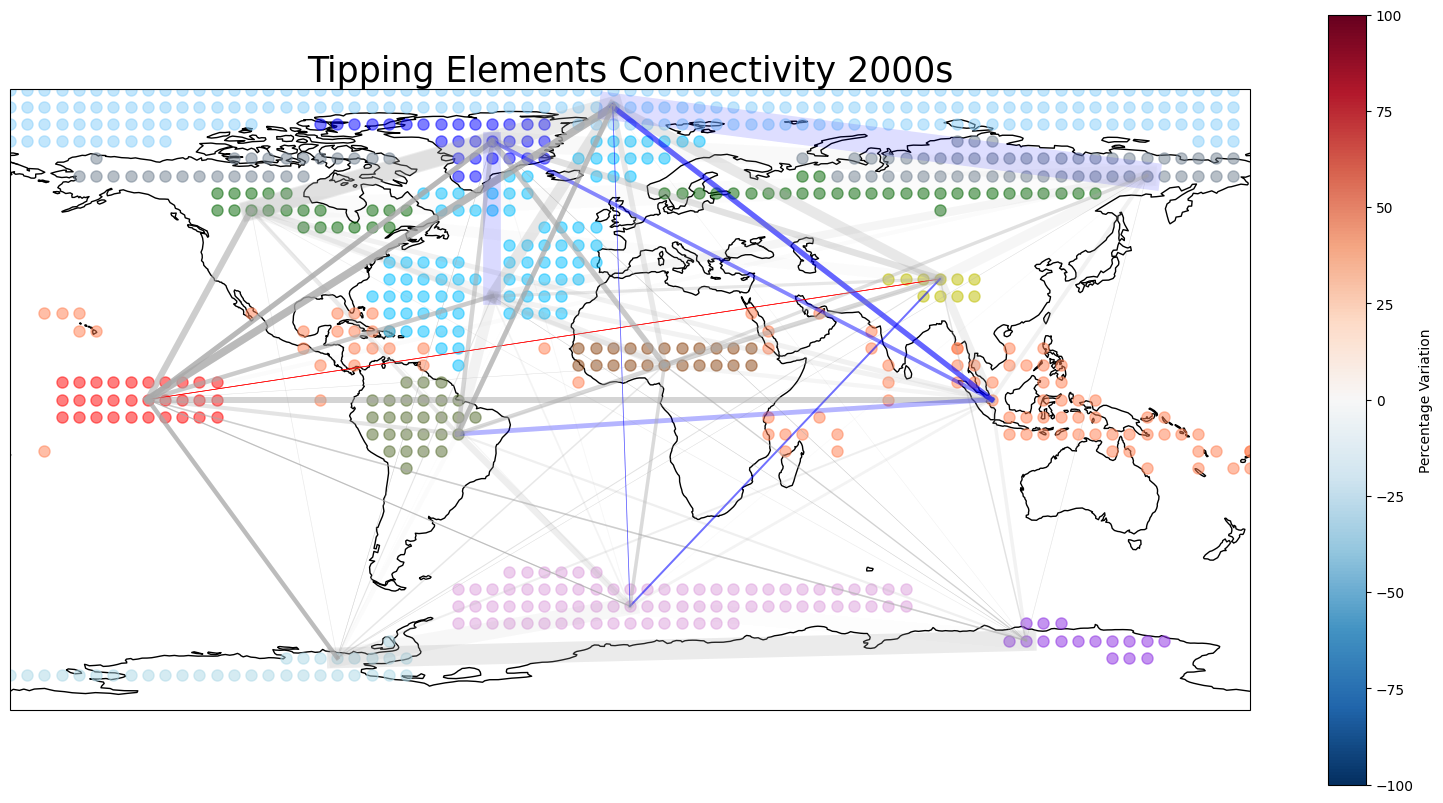

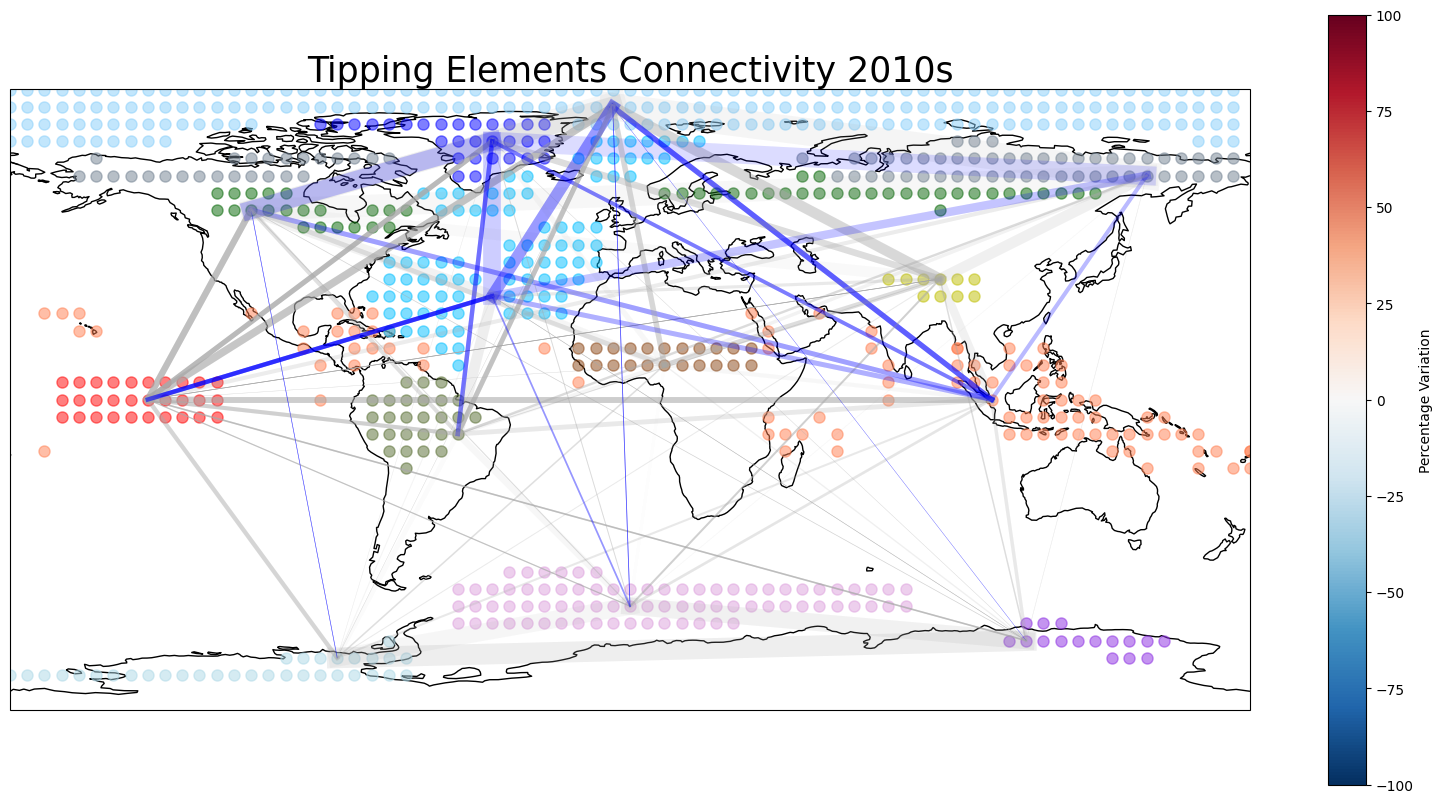

In [175]:

def get_color(value):
    if value > 0:
        return 'red'
    elif value < 0:
        return 'blue'
    else:
        return 'black' 



exclude = ['AMOC Up', 'AMOC Subpolar Gyre', 'AMOC Gulf', 'AMOC Europe North Africa', 'World'] #

for decade in decades:
   
    cmap = plt.cm.RdBu_r
    norm = Normalize(vmin=-100, vmax=100)
    sm = ScalarMappable(norm=norm, cmap=cmap)


    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_global()
    #ax.stock_img()
    ax.coastlines()
    
    tipping_points_decade = {}  
    for tip, attrs in tipping_points.items():
        if tip not in exclude:
            tipping_points_decade[tip] = attrs

    for tip, attrs in tipping_points.items():
        if tip not in exclude:
            nodes = attrs[0]  
            color = attrs[1]  
            for node in nodes:  
                lat, lon = node  
                ax.plot(lon, lat, marker='o', markersize=8, linestyle='None', color=color, alpha=0.5, transform=ccrs.Geodetic())
    

    for point1, point2 in product(tipping_points_decade.keys(), repeat=2):
        lat1, lon1 = tipping_points_decade[point1][2]
        lat2, lon2 = tipping_points_decade[point2][2]
        if point1 != point2 and point1 not in exclude and point2 not in exclude:

            thickness_mean = adjacency_matrix_mean[(point1, point2)][decades[0]]        
            thickness_std = adjacency_matrix_std[(point1, point2)][decade]
            percentage_variation = adjacency_matrix_pervar[(point1, point2)][decade]
            pvalue = adjacency_matrix_pvalue[(point1, point2)][decade]

            color = get_color(percentage_variation)
            transparency = np.abs(percentage_variation) / 100
            transparency = max(0, min(1, transparency))

            num_points = 100
            lon_arc = np.linspace(lon1, lon2, num_points)
            lat_arc = np.linspace(lat1, lat2, num_points)
            
            if pvalue <= 0.05:
                ax.plot(lon_arc, lat_arc, color=color, linewidth=thickness_mean*40, alpha=transparency, transform=ccrs.PlateCarree())
            else:
                ax.plot(lon_arc, lat_arc, color='darkgrey', linewidth=thickness_mean*40, alpha=transparency, transform=ccrs.PlateCarree())


    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label('Percentage Variation')
    ax.set_title("Tipping Elements Connectivity {}s".format(decade), fontsize=25, loc='center')

    # Save
    percorso_file = f'C:\\Users\\David\\OneDrive\\Desktop\\CLIMATE_NETWORK\\Paper\\PLOT\\Tipping Points\\tipping_points_connectivity_{decade}.pdf'
    plt.savefig(percorso_file,bbox_inches='tight',format='pdf')
    plt.show()
    plt.close(fig)

In [146]:
df_loaded_CMIP6 = pd.read_csv('C:\\Users\\David\\OneDrive\\Desktop\\CLIMATE_NETWORK\\Paper\\temp_tipping_mean_std_values_2022_2100.csv', header=[0, 1], index_col=[0, 1])
decades_CMIP6 = [2022, 2030, 2040, 2050, 2060, 2070, 2080, 2090]


pairs = list(product(tipping_points.keys(), repeat=2))
multiindex_columns = pd.MultiIndex.from_tuples(pairs)

adjacency_matrix_mean_CMIP6 = pd.DataFrame(index=decades_CMIP6, columns=multiindex_columns)
adjacency_matrix_std_CMIP6 = pd.DataFrame(index=decades_CMIP6, columns=multiindex_columns)
adjacency_matrix_pervar_CMIP6 = pd.DataFrame(index=decades_CMIP6, columns=multiindex_columns)
adjacency_matrix_pvalue_CMIP6 = pd.DataFrame(index=decades_CMIP6, columns=multiindex_columns)

subset_2022 = df_loaded_CMIP6.loc[(slice(decades_CMIP6[0], decades_CMIP6[1]-1), 'mean'), :]

for dec in decades_CMIP6:
    for point1, point2 in pairs:

        start_year = dec
        end_year = dec + 10
        subset = df_loaded_CMIP6.loc[(slice(start_year, end_year-1), slice(None)), (point1, point2)]

        mean_value = subset.xs('mean', level=1).mean()
        std_values = subset.xs('std', level=1)
        combined_std = np.sqrt(np.sum(std_values**2)) / len(std_values)


        adjacency_matrix_mean_CMIP6.loc[dec, (point1, point2)] = mean_value
        adjacency_matrix_std_CMIP6.loc[dec, (point1, point2)] = combined_std

        f_stat, p_value = f_oneway(subset_2022[(point1, point2)], subset.xs('mean', level=1))
        adjacency_matrix_pvalue_CMIP6.loc[dec, (point1, point2)] = p_value


        #adjacency_matrix_pervar.loc[dec, (point1, point2)] = 0  
        riferimento = adjacency_matrix_mean_CMIP6.loc[decades_CMIP6[0], (point1, point2)]
        variazione_percentuale = ((mean_value - riferimento) / riferimento) * 100
        adjacency_matrix_pervar_CMIP6.loc[dec, (point1, point2)] = variazione_percentuale

# Visualizzazione delle matrici
print("Mean Adjacency Matrix:")
print(adjacency_matrix_mean_CMIP6)
print("\nStandard Deviation Adjacency Matrix:")
print(adjacency_matrix_std_CMIP6)
print("\nPercentage Variation Adjacency Matrix:")
subset_1970[(point1, point2)]
adjacency_matrix_pervar_CMIP6

Mean Adjacency Matrix:
     El Nino Basin                                         \
     El Nino Basin   AMOC Up AMOC Subpolar Gyre AMOC Gulf   
2022      0.524111  0.051136           0.160287  0.131283   
2030      0.539302  0.045028           0.160226  0.122296   
2040      0.532659  0.038961            0.17223   0.12413   
2050      0.513902  0.037571           0.189867  0.106854   
2060      0.525422  0.029743           0.177137  0.095488   
2070      0.508853  0.028374           0.167432  0.080594   
2080      0.516391  0.024792            0.16766  0.069908   
2090      0.513714  0.019144           0.158801  0.055363   

                                                                     \
     AMOC Europe North Africa Tibetan Plateau Snow Cover Coral Reef   
2022                 0.026749                   0.016325   0.078412   
2030                 0.024811                   0.014808   0.081382   
2040                 0.023706                   0.018369   0.080864   
2050       

El Nino Basin                                           \
     El Nino Basin    AMOC Up AMOC Subpolar Gyre  AMOC Gulf   
2022           0.0        0.0                0.0        0.0   
2030      2.898463 -11.944896          -0.037855  -6.845507   
2040      1.631025 -23.809919           7.450728  -5.448348   
2050      -1.94781 -26.528318          18.454216 -18.608084   
2060      0.250072 -41.834703          10.512116 -27.265655   
2070     -2.911288 -44.512428           4.457785 -38.610288   
2080     -1.473066 -51.517029             4.5997  -46.75045   
2090     -1.983828 -62.562384          -0.927268 -57.829444   

                                                                     \
     AMOC Europe North Africa Tibetan Plateau Snow Cover Coral Reef   
2022                      0.0                        0.0        0.0   
2030                -7.245633                  -9.292301   3.787121   
2040               -11.376122                  12.521483   3.126708   
2050               -20.575389                 105.583637  -0.053258   
2060                -6.862702                  20.106355    2.96936   
2070               -46.950452                  13.219633  -3.012934   
2080               -24.059984                   1.541462  -2.876076   
2090               -33.038247                   4.792114  -3.434723   

                                                          ...     All AMOC  \
     West Antarctic Ice Sheet Wilkes Basin Boreal Forest  ... Wilkes Basin   
2022                      0.0          0.0           0.0  ...          0.0   
2030                 25.70925   -14.862714      0.108019  ...    24.004075   
2040                  5.99238   -17.913152      4.153475  ...   160.044169   
2050                 7.343907     32.70156     -5.177393  ...   116.516075   
2060                -2.494885    -9.822532    -15.135367  ...    13.411635   
2070               -18.092179   -12.746735    -29.770741  ...    51.734816   
2080               -23.358165    -4.046716    -32.086321  ...    84.933385   
2090               -20.633028   -33.133674    -29.159298  ...    56.426993   

                                                                 \
     Boreal Forest Artic See Ice Permafrost Greenland Ice Sheet   
2022           0.0           0.0        0.0                 0.0   
2030      3.476355     -3.128097  -0.649023            0.495546   
2040      -2.12726     -0.675704  -2.779246            3.616739   
2050     -6.375864     -2.426823  -7.454774           -0.036488   
2060     -0.647948     -1.689817 -10.696537            3.387965   
2070     -3.710798    -10.502949  -11.42193           -3.063861   
2080     -9.269335    -13.435779  -18.74364            -3.35585   
2090    -11.291753     -9.045787 -19.057142           -2.138571   

                                                                              \
     Amazon Rainforest Southern Meridional Overturning Circulation     Sahel   
2022               0.0                                         0.0       0.0   
2030           7.45348                                   17.308293  4.847125   
2040          0.530547                                   38.280463 -7.952178   
2050          0.670144                                   31.587707 -6.525113   
2060          8.410031                                   14.666819  -1.77637   
2070         11.846477                                   22.675628 -5.259502   
2080         13.302925                                   46.486646  5.993941   
2090          4.513376                                   82.717581  7.725555   

                          
         World  All AMOC  
2022       0.0       0.0  
2030 -0.340647  0.560974  
2040 -2.660361  2.044406  
2050 -2.723376  1.643092  
2060 -1.237677  3.192686  
2070 -3.620306  5.094559  
2080 -2.664265  5.586917  
2090 -4.873113  5.996554  

[8 rows x 324 columns]

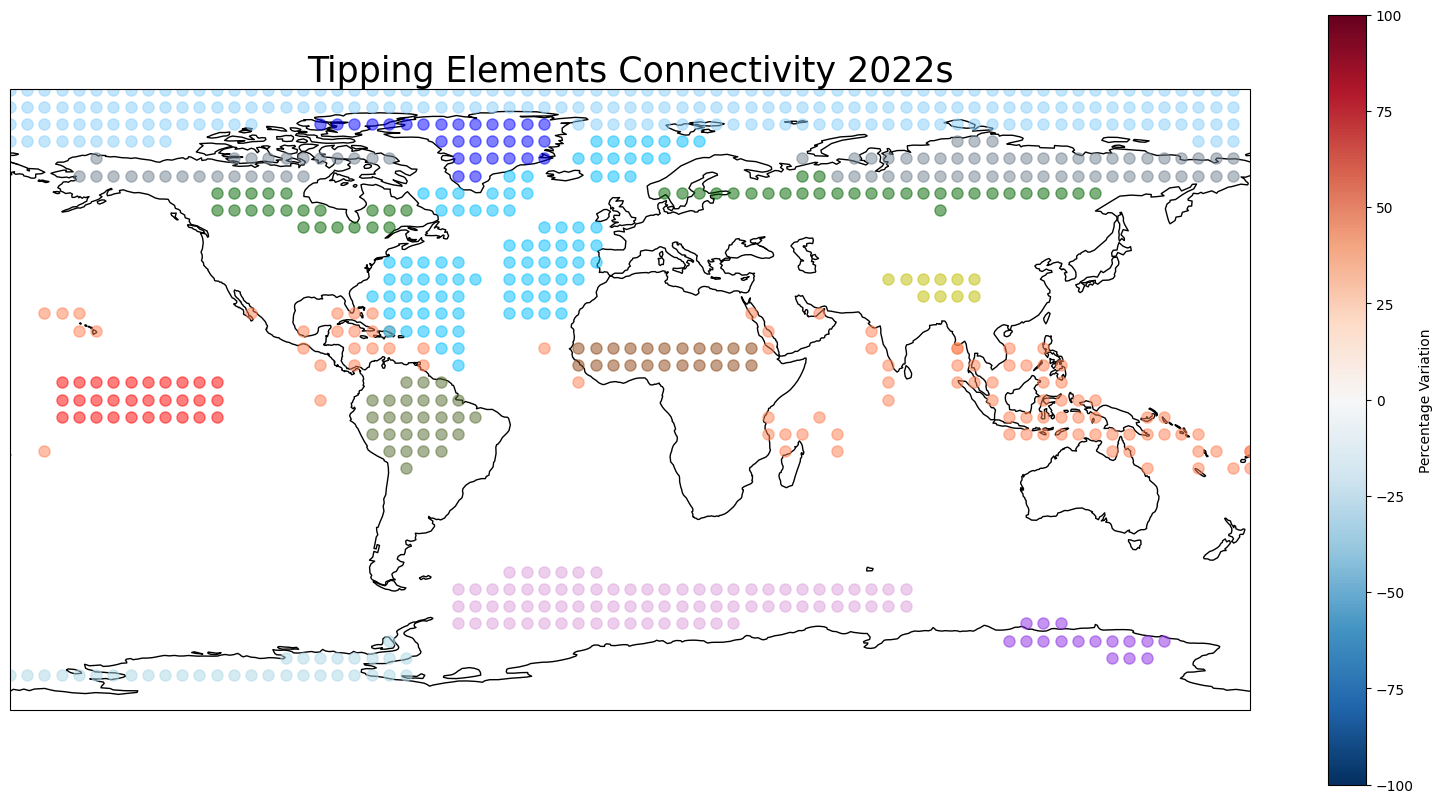

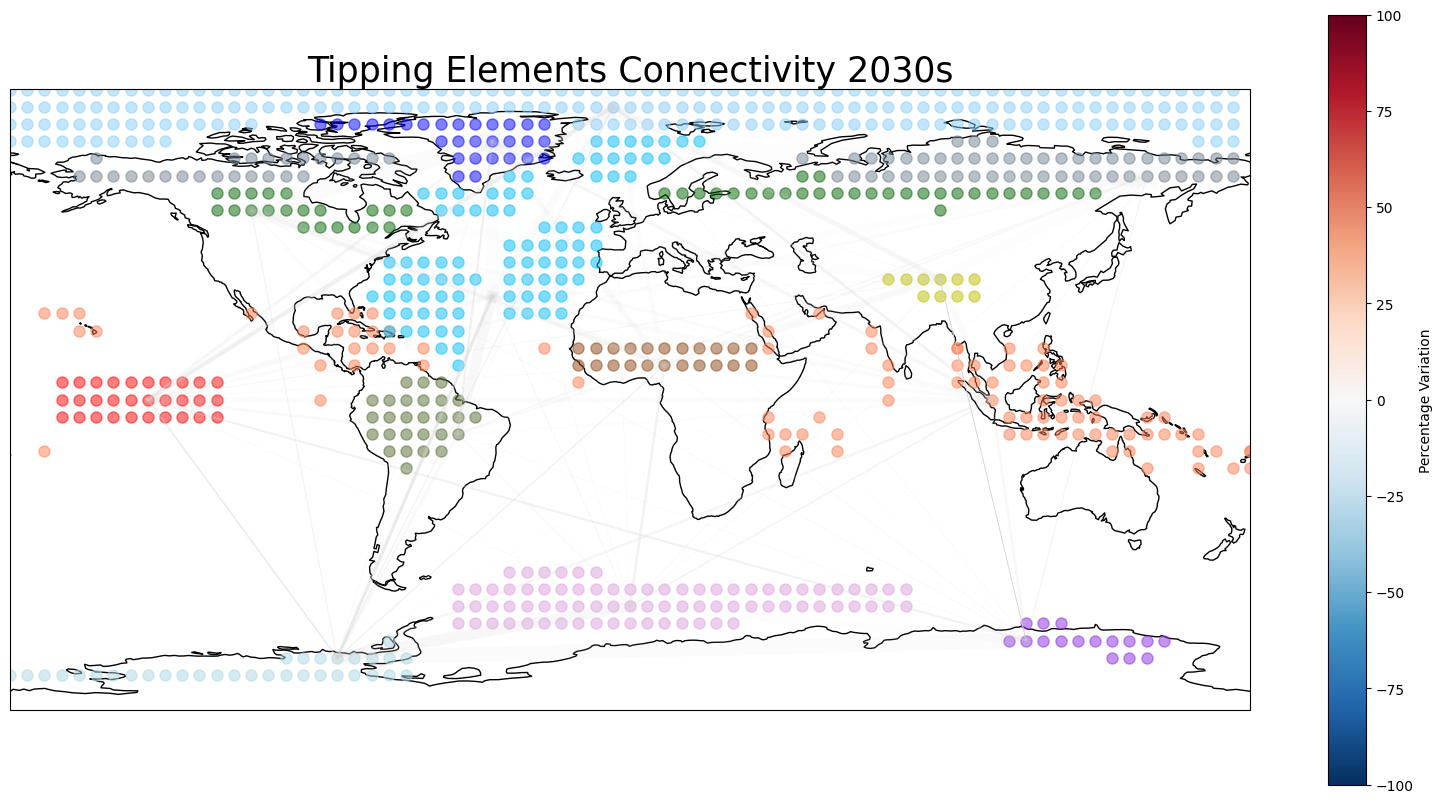

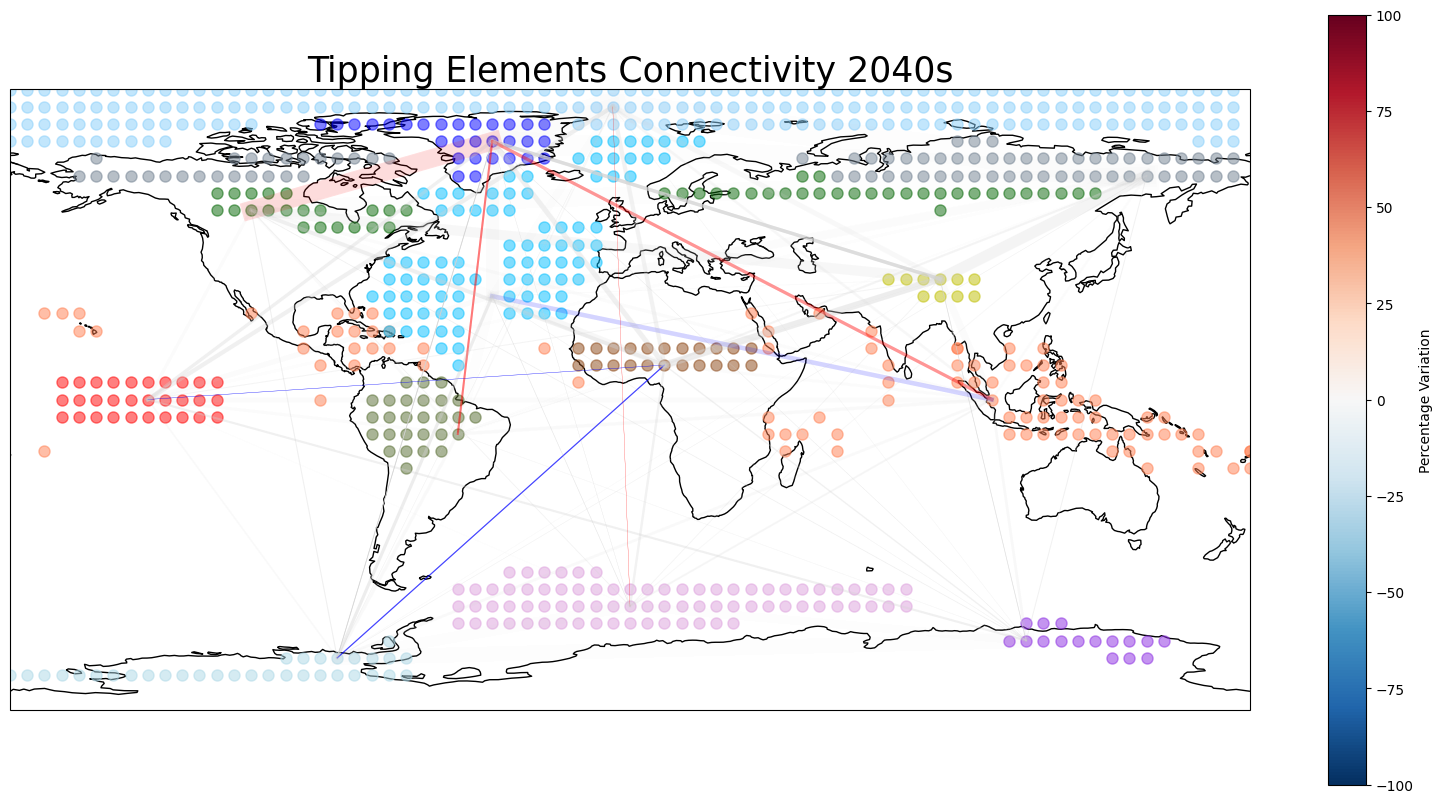

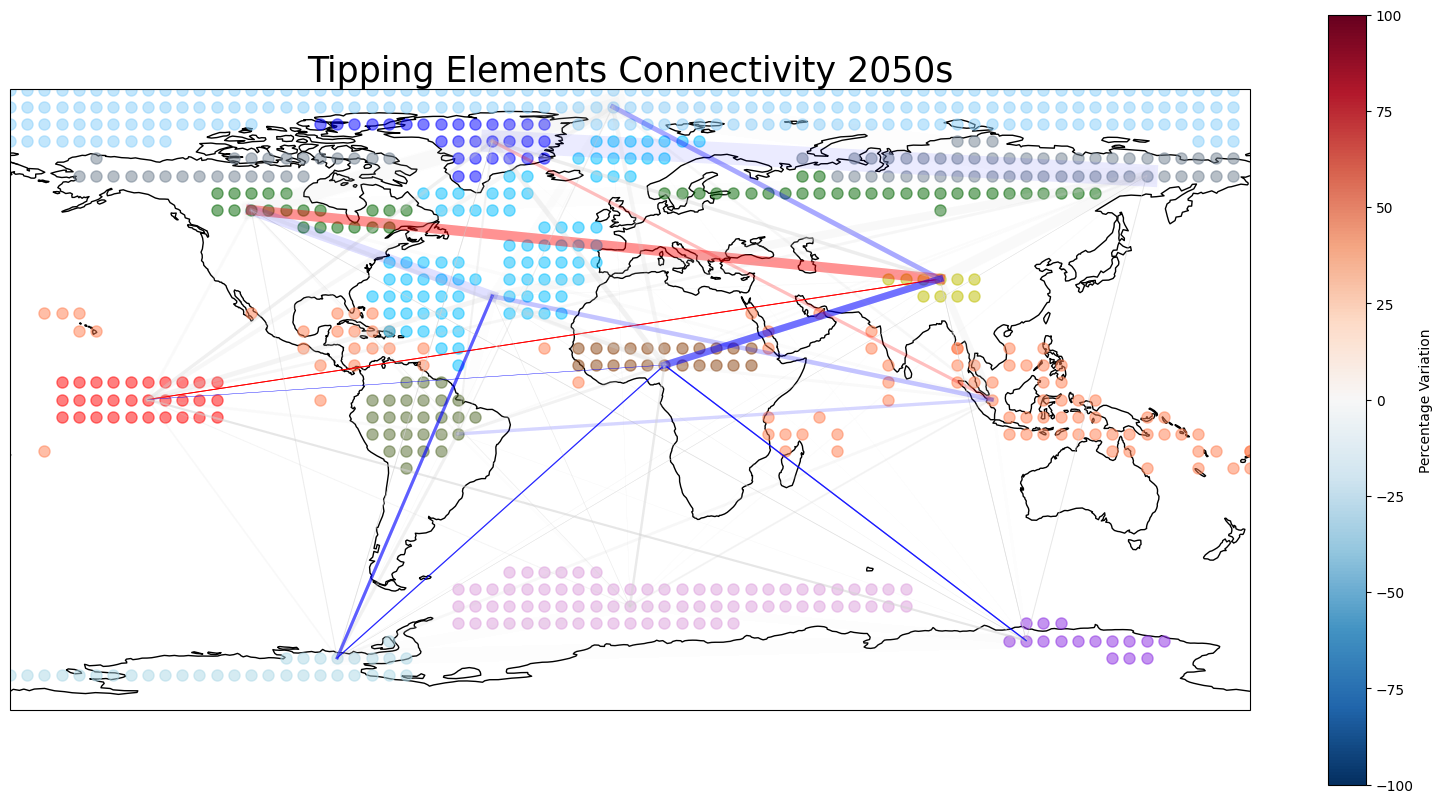

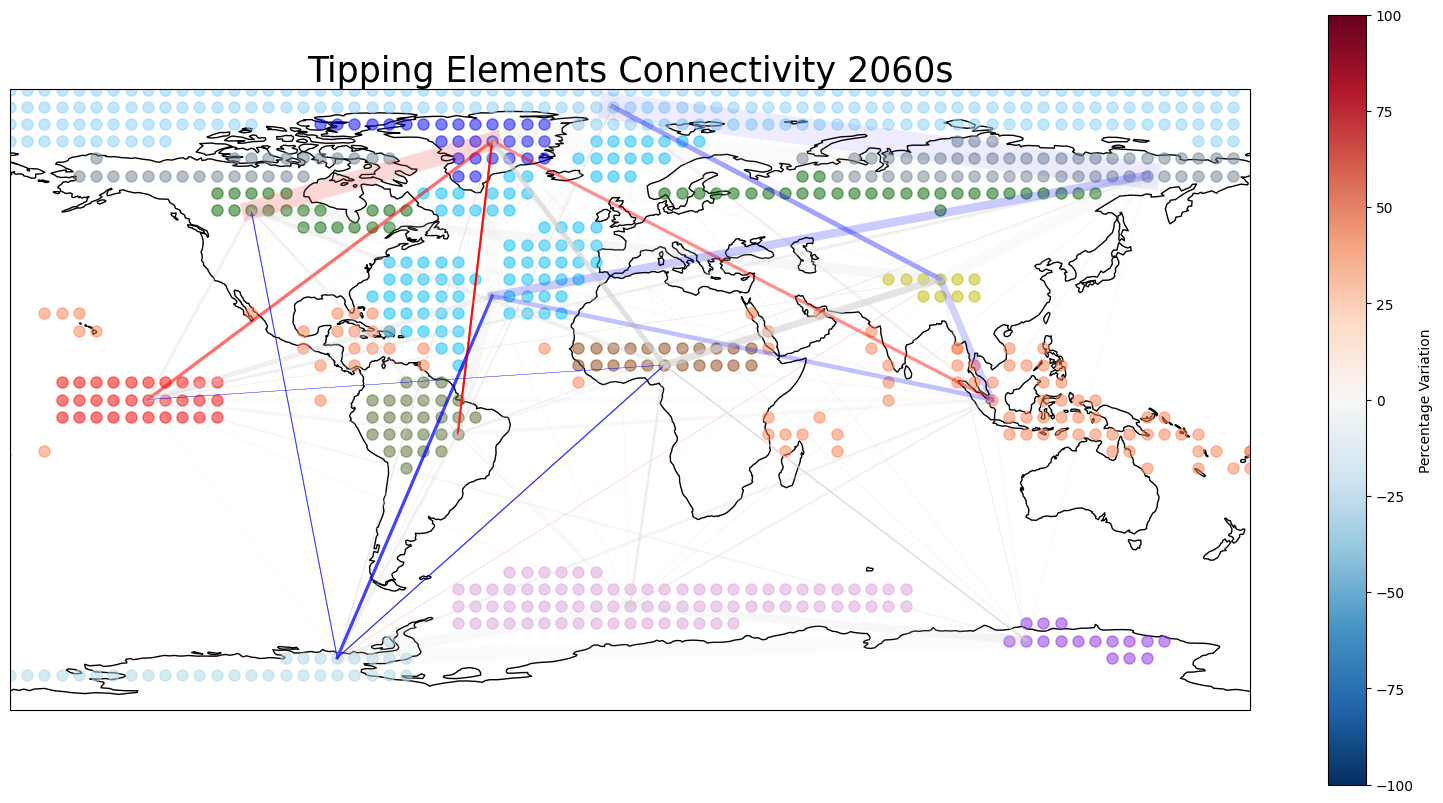

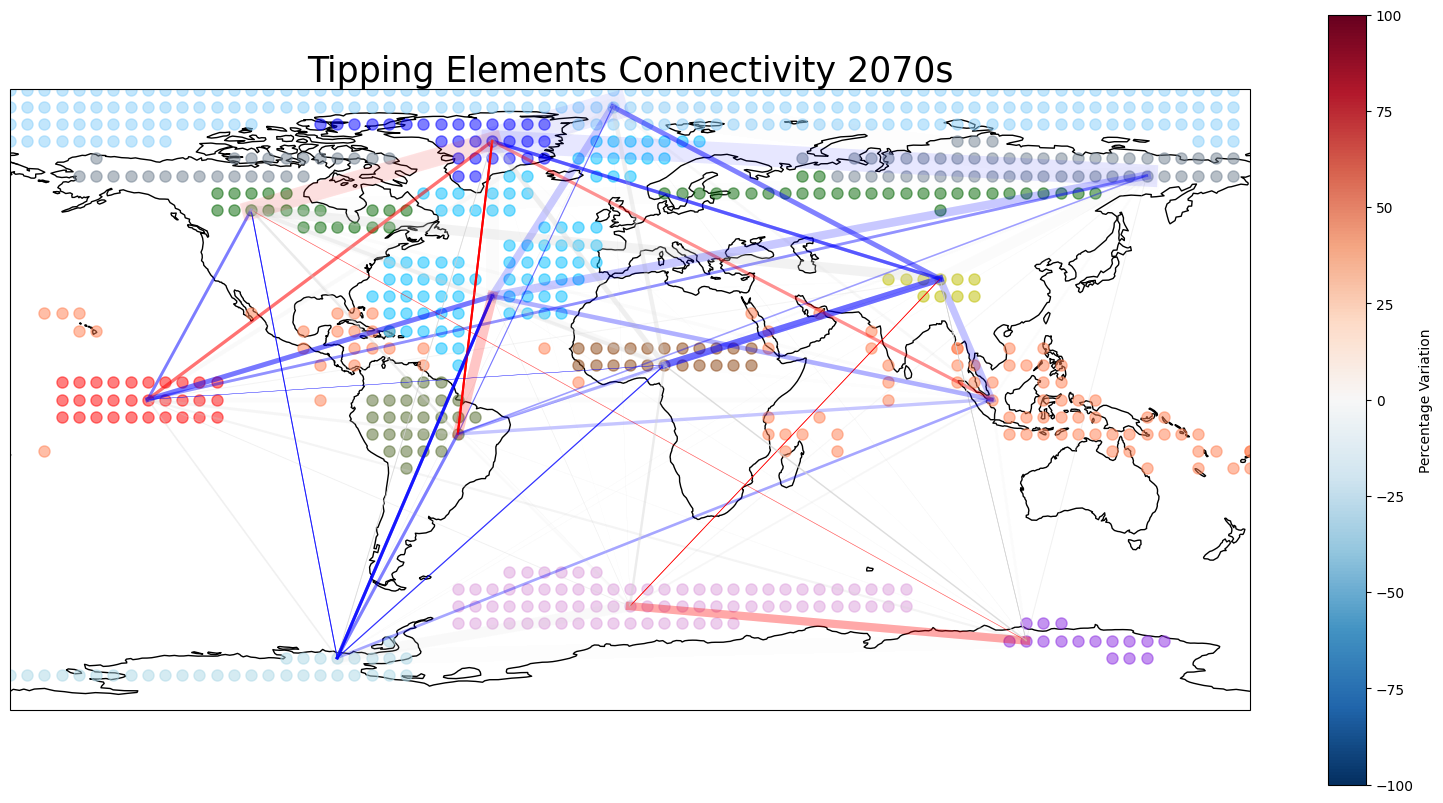

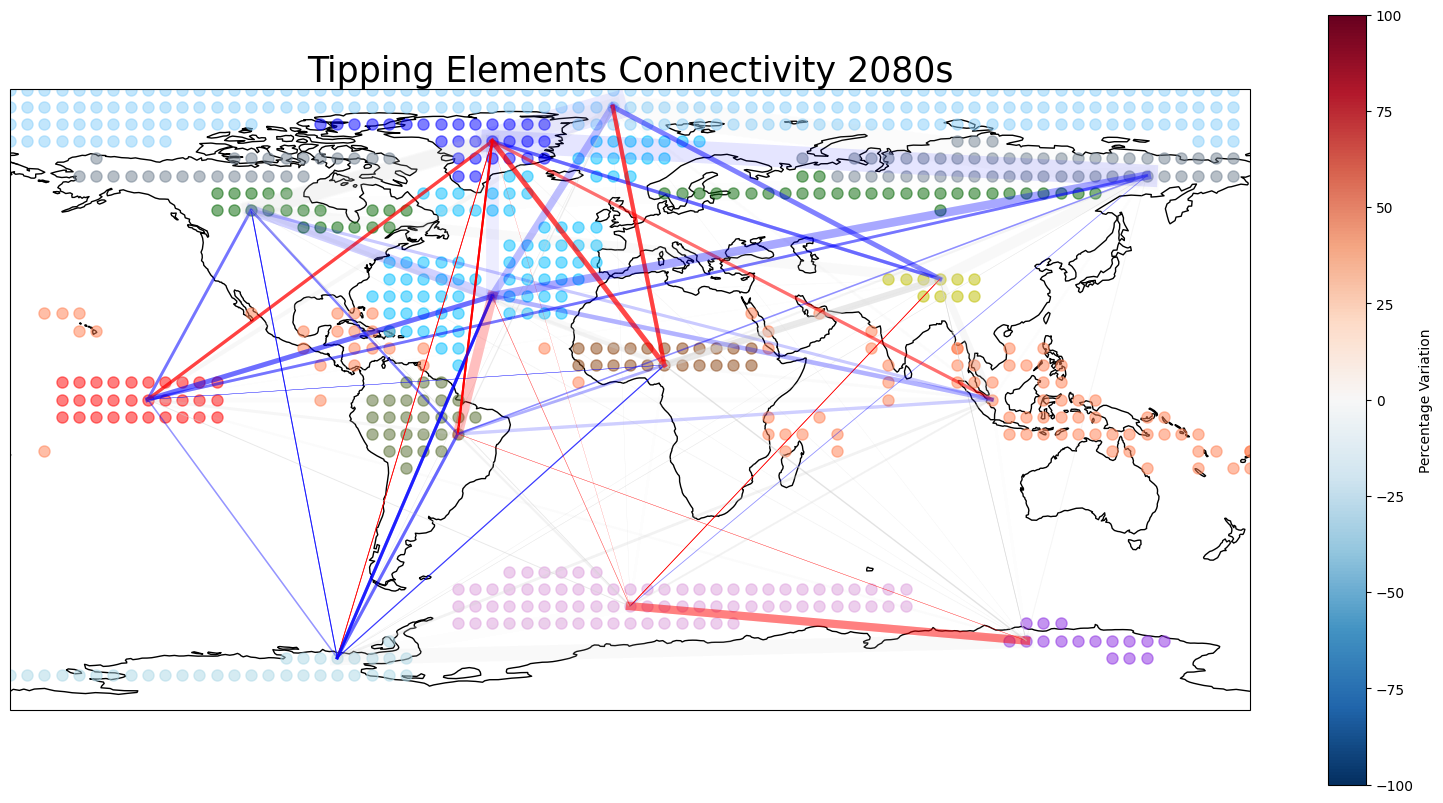

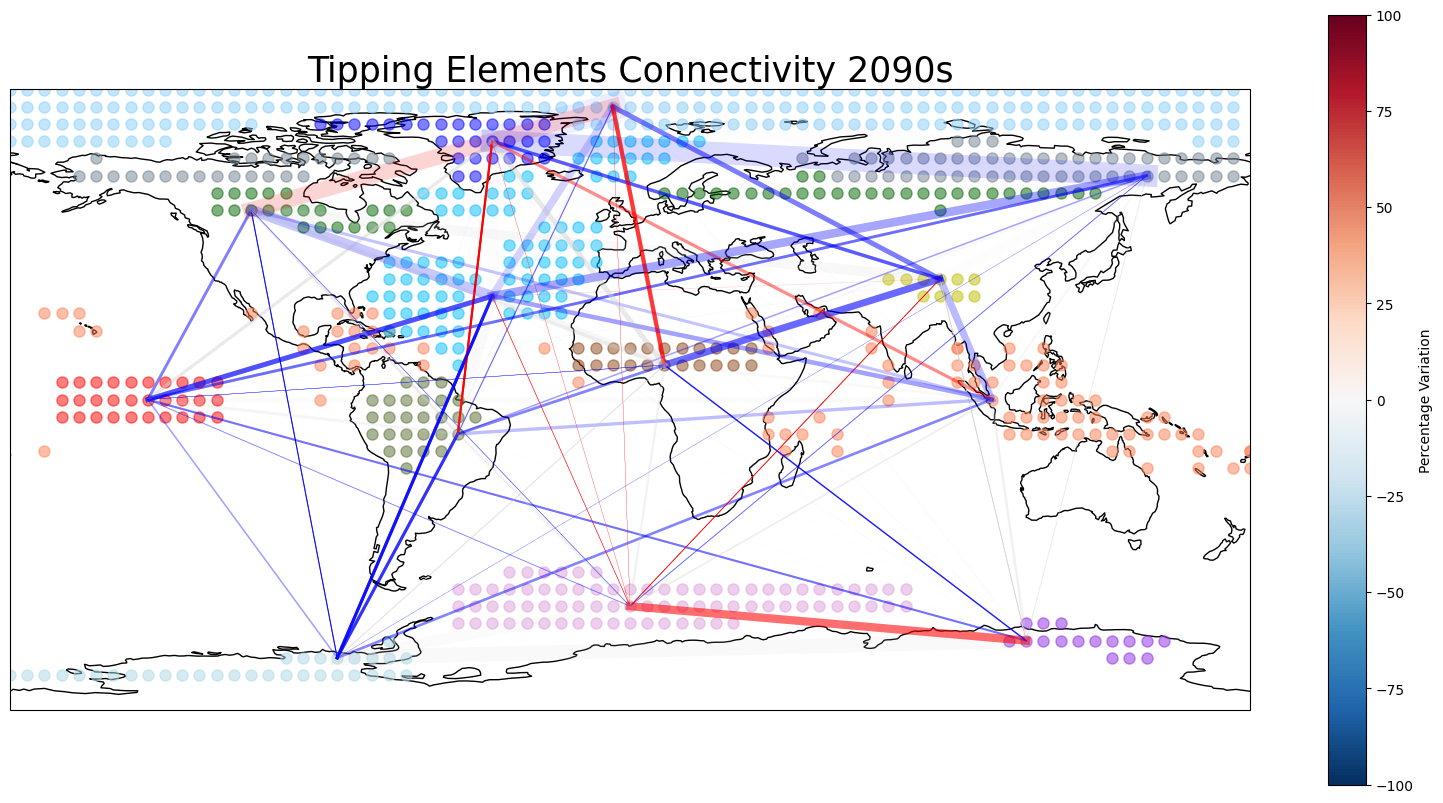

In [183]:

def get_color(value):
    if value > 0:
        return 'red'
    elif value < 0:
        return 'blue'
    else:
        return 'black' 



exclude = ['AMOC Up', 'AMOC Subpolar Gyre', 'AMOC Gulf', 'AMOC Europe North Africa', 'World'] #

for decade in decades_CMIP6:
   
    cmap = plt.cm.RdBu_r
    norm = Normalize(vmin=-100, vmax=100)
    sm = ScalarMappable(norm=norm, cmap=cmap)


    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_global()
    #ax.stock_img()
    ax.coastlines()
    
    tipping_points_decade = {}  
    for tip, attrs in tipping_points.items():
        if tip not in exclude:
            tipping_points_decade[tip] = attrs

    for tip, attrs in tipping_points.items():
        if tip not in exclude:
            nodes = attrs[0]  
            color = attrs[1]  
            for node in nodes:  
                lat, lon = node  
                ax.plot(lon, lat, marker='o', markersize=8, linestyle='None', color=color, alpha=0.5, transform=ccrs.Geodetic())
    

    for point1, point2 in product(tipping_points_decade.keys(), repeat=2):
        lat1, lon1 = tipping_points_decade[point1][2]
        lat2, lon2 = tipping_points_decade[point2][2]
        if point1 != point2 and point1 not in exclude and point2 not in exclude:

            thickness_mean = adjacency_matrix_mean_CMIP6[(point1, point2)][decades_CMIP6[0]]        
            thickness_std = adjacency_matrix_std_CMIP6[(point1, point2)][decade]
            percentage_variation = adjacency_matrix_pervar_CMIP6[(point1, point2)][decade]
            pvalue = adjacency_matrix_pvalue_CMIP6[(point1, point2)][decade]

            color = get_color(percentage_variation)
            transparency = np.abs(percentage_variation) / 100
            transparency = max(0, min(1, transparency))

            num_points = 100
            lon_arc = np.linspace(lon1, lon2, num_points)
            lat_arc = np.linspace(lat1, lat2, num_points)
            
            if pvalue <= 0.05:
                ax.plot(lon_arc, lat_arc, color=color, linewidth=thickness_mean*40, alpha=transparency, transform=ccrs.PlateCarree())
            else:
                ax.plot(lon_arc, lat_arc, color='lightgrey', linewidth=thickness_mean*40, alpha=transparency, transform=ccrs.PlateCarree())


    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label('Percentage Variation')
    ax.set_title("Tipping Elements Connectivity {}s".format(decade), fontsize=25, loc='center')

    # Save
    percorso_file = f'C:\\Users\\David\\OneDrive\\Desktop\\CLIMATE_NETWORK\\Paper\\PLOT\\Tipping Points\\tipping_points_connectivity_{decade}.pdf'
    plt.savefig(percorso_file,bbox_inches='tight',format='pdf')
    plt.show()
    plt.close(fig)